# Explore here

In [28]:
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
data_X = data[["Latitude","Longitude","MedInc"]]
data_X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [30]:
from sklearn.model_selection import train_test_split
Train_X , Test_X =train_test_split(data_X, test_size=0.2, random_state = 42)

In [31]:
Train_X.shape

(16512, 3)

In [32]:
Test_X.shape

(4128, 3)

In [33]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_norm = preprocessing.scale(data_X, axis =0)

In [34]:
pca_model = PCA(n_components = 2)

In [35]:
data_vis = pca_model.fit_transform(data_X)

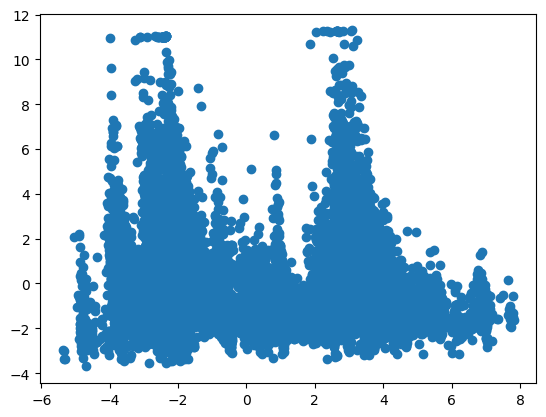

In [36]:
import matplotlib.pyplot as plt
plt.scatter(data_vis[:,0],data_vis[:,1])

In [37]:
from sklearn.cluster import KMeans

clust_model = KMeans(n_clusters=6)

In [38]:
clust_model.fit(Train_X)

KMeans(n_clusters=6)

In [39]:
Train_X["Target"]=clust_model.labels_
Train_X.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,0
8267,33.77,-118.16,3.8125,0
17445,34.66,-120.48,4.1563,4
14265,32.69,-117.11,1.9425,0
2271,36.78,-119.80,3.5542,4


In [40]:
data_norm = preprocessing.scale(Train_X.drop("Target",axis=1), axis =0)

In [41]:
pca_model = PCA(n_components = 2)

In [42]:
data_vis = pca_model.fit_transform(data_norm)

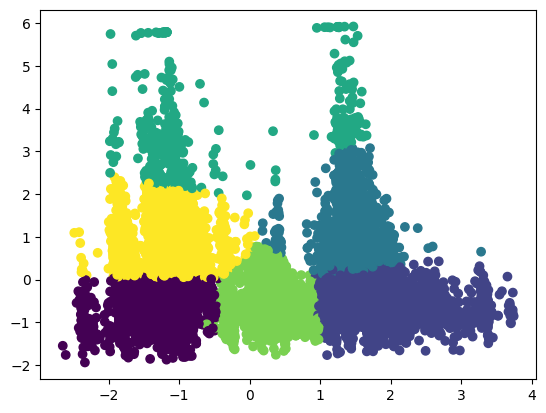

In [43]:
plt.scatter(data_vis[:,0],data_vis[:,1],c = Train_X["Target"])

In [44]:
test_label = clust_model.predict(Test_X)

In [45]:
Test_X["Target"] = test_label
Test_X.head()

,Latitude,Longitude,MedInc,Target
20046,36.06,-119.01,1.6812,4
3024,35.14,-119.46,2.5313,4
15663,37.80,-122.44,3.4801,1
20484,34.28,-118.72,5.7376,5
9814,36.62,-121.93,3.7250,1
